# Pêndulo não linear

A integração numérica não tem realmente vantagens em relação, por exemplo, à convolução numérica, exceto, é claro, quando o problema é não linear, e este é único método que se aplica.

A equação do movimento para um pêndulo simples pode ser obtida facilmente como
$$ \ddot \theta + \frac{g}{l} \sin \theta = 0,$$
que temos tratado através da linearização do termo em $\theta$ para 
$$ \ddot \theta + \frac{g}{l} \theta = 0.$$

Vamos comparara resultados obtidos com as duas equações, para pequenos e grandes ângulos.

In [163]:
## Setup
import numpy as np
import scipy as sp
from scipy.constants import g
%matplotlib inline
import matplotlib.pyplot as plt

## Comprimento do pêndulo

O comprimento do pêndulo claramente foi cuidadosamente escolhido para a solução linear dar uma valor interessante para o período.

In [164]:
l = g/(2*np.pi)**2

## Equações dos pêndulos

Precisamos transformar a equações diferenciais de segunda ordem em sistemas de equações diferenciais de primeira ordem, para poder usar o integrador numérico.

Para a solução linear, definindo $\theta_1 = \theta$ e $\theta_2 = \dot \theta_1$, ficamos com
$$ \dot \theta_2 + \frac{g}{l} \theta_1 = 0,$$
e para a equação não linear,
$$ \dot \theta_2 + \frac{g}{l} \sin \theta_1 = 0,$$
e podemos então montar os sistemas de primeira ordem.

Para a equação linear
$$\left\lbrace
\begin{aligned}
\dot \theta_1 &= \theta_2\\
\dot \theta_2 &= -\frac{g}{l} \theta_1
\end{aligned}
\right.,$$

e para a equação não linear
$$\left\lbrace
\begin{aligned}
\dot \theta_1 &= \theta_2\\
\dot \theta_2 &= -\frac{g}{l} \sin\theta_1
\end{aligned}
\right..$$



## Jacobiano

Não é estritamente necessário, mas ajuda a solução de problemas não lineares se você informar o Jacobiano do sistema.
O Jacobiano para este caso é definido como
$$ J(\theta_1, \theta_2) =
\begin{bmatrix}
\displaystyle
\frac{\partial f_1}{\theta_1} &\displaystyle\frac{\partial f_1}{\theta_2}\\
\displaystyle\frac{\partial f_2}{\theta_1} &\displaystyle\frac{\partial f_2}{\theta_2}
\end{bmatrix}, $$
com $f_1(\theta_1, \theta_2) = \theta_2$ e $f_2(\theta_1, \theta_2) = -(g/l) \sin\theta_1$, temos então
$$ J(\theta_1, \theta_2) =
\begin{bmatrix}
0 & 1\\
\displaystyle -\frac{g}{l}\cos \theta_1  & 0
\end{bmatrix}. $$

Precisamos colocar isto na forma de uma função que possa ser chamada pelo SciPy.

## Definição das funções

Precisamos programar os sistemas de equações e o Jacobiano,

In [165]:
def pend_linear(t, y, mgol):       # Pendulo linear
    return (y[1], mgol*y[0])       # mgol = minus g over l

def pend_non_linear(t, y, mgol):   # Pendulo não linear
    return (y[1], mgol*np.sin(y[0]))       # mgol = minus g over l

def Jac(t, y, mgol):
    return np.array([[0, 1], [mgol*np.cos(y[0]), 0]]) 

## Pequenos ângulos
Vamos usar condições iniciais que correspondam a pequenos ângulos.

In [166]:
y0 = np.radians(np.array([ 5, 0]))   # valor numérico dado em graus para facilitar, cálculos em radianos

Mensagem solução linear: The solver successfully reached the end of the integration interval.
Solução linear convergiu após 218 passos.
Mensagem solução não linear: The solver successfully reached the end of the integration interval.
Solução linear convergiu após 218 passos.


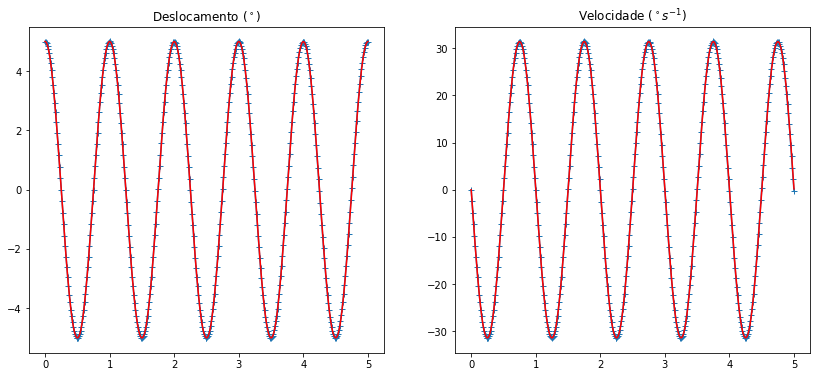

In [167]:
times = np.linspace(0, 5, 401)
sol_1 = sp.integrate.solve_ivp(pend_linear, t_span=(times[0], times[-1]), y0=y0,
                               args=(-g/l,),
                               t_eval=times, vectorized=True)

print(f"Mensagem solução linear: {sol_1.message}")
if sol_1.success:
    print(f"Solução linear convergiu após {sol_1.nfev} passos.")
    
sol_2 = sp.integrate.solve_ivp(pend_non_linear, t_span=(times[0], times[-1]), y0=y0,
                               args=(-g/l,),
                               t_eval=times, vectorized=True)   

print(f"Mensagem solução não linear: {sol_2.message}")
if sol_2.success:
    print(f"Solução linear convergiu após {sol_1.nfev} passos.")
    

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, np.degrees(sol_1.y[0]), marker='+') # Posição
ax[0].plot(sol_2.t, np.degrees(sol_2.y[0]), color='red')
ax[0].set_title(r'Deslocamento (${}^\circ$)')
ax[1].plot(sol_1.t, np.degrees(sol_1.y[1]), marker='+') # Velocidade
ax[1].plot(sol_2.t, np.degrees(sol_2.y[1]), color='red')  

_ = ax[1].set_title(r'Velocidade (${}^\circ s^{ -1}$)')

## Cálculo da energia mecânica total

Vamos admitir que a massa é unitária, então em cada instante de tempo a energia total é
$$ E = T + U, $$
$$ E = \frac{1}{2} m \dot x^2 + m g h,$$
$$ E = \frac{1}{2} l^2  \dot\theta^2 + gl (1-\cos\theta).$$

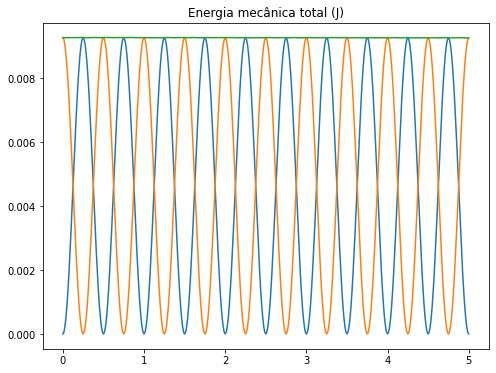

In [168]:
T = 0.5*l**2*sol_2.y[1]**2
U = g*l*(1-np.cos(sol_2.y[0]))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sol_1.t, T) 
ax.plot(sol_1.t, U)
ax.plot(sol_1.t, T+U)
_ = ax.set_title(r'Energia mecânica total (J)')

## Grandes ângulos

Esperamos agora que a não linearidade faça alguma diferença!
Vamos tentar sem o Jacobiano para ver se faz diferença também.

In [169]:
y0 = np.radians(np.array([ 85, 0]))   # valor numérico dado em graus para facilitar, cálculos em radianos

Mensagem solução linear: The solver successfully reached the end of the integration interval.
Solução linear convergiu após 224 passos.
Mensagem solução não linear: The solver successfully reached the end of the integration interval.
Solução linear convergiu após 260 passos.


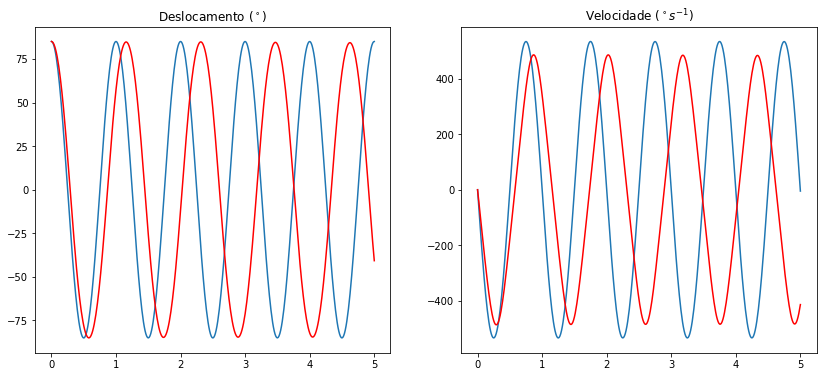

In [170]:
times = np.linspace(0, 5, 401)
sol_1 = sp.integrate.solve_ivp(pend_linear, t_span=(times[0], times[-1]), y0=y0,
                               args=(-g/l,),
                               t_eval=times, vectorized=True)

print(f"Mensagem solução linear: {sol_1.message}")
if sol_1.success:
    print(f"Solução linear convergiu após {sol_1.nfev} passos.")
    
sol_2 = sp.integrate.solve_ivp(pend_non_linear, t_span=(times[0], times[-1]), y0=y0,
                               args=(-g/l,),
                               t_eval=times, vectorized=True)   

print(f"Mensagem solução não linear: {sol_2.message}")
if sol_2.success:
    print(f"Solução linear convergiu após {sol_2.nfev} passos.")
    

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, np.degrees(sol_1.y[0])) # Posição
ax[0].plot(sol_2.t, np.degrees(sol_2.y[0]), color='red')
ax[0].set_title(r'Deslocamento (${}^\circ$)')
ax[1].plot(sol_1.t, np.degrees(sol_1.y[1])) # Velocidade
ax[1].plot(sol_2.t, np.degrees(sol_2.y[1]), color='red')  

_ = ax[1].set_title(r'Velocidade (${}^\circ s^{ -1}$)')

## Energia mecânica total

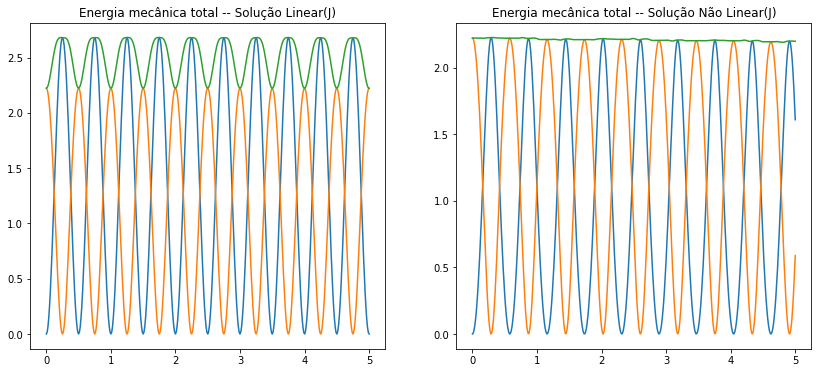

In [171]:
T1 = 0.5*l**2*sol_1.y[1]**2
U1 = g*l*(1-np.cos(sol_1.y[0]))
T2 = 0.5*l**2*sol_2.y[1]**2
U2 = g*l*(1-np.cos(sol_2.y[0]))
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, T1) 
ax[0].plot(sol_1.t, U1)
ax[0].plot(sol_1.t, T1+U1)
ax[1].plot(sol_1.t, T2) 
ax[1].plot(sol_1.t, U2)
ax[1].plot(sol_1.t, T2+U2)
ax[0].set_title(r'Energia mecânica total -- Solução Linear(J)')
_ = ax[1].set_title(r'Energia mecânica total -- Solução Não Linear(J)')

### Solução com o Jacobiano

Mensagem solução não linear: The solver successfully reached the end of the integration interval.
Solução linear convergiu após 514 passos.


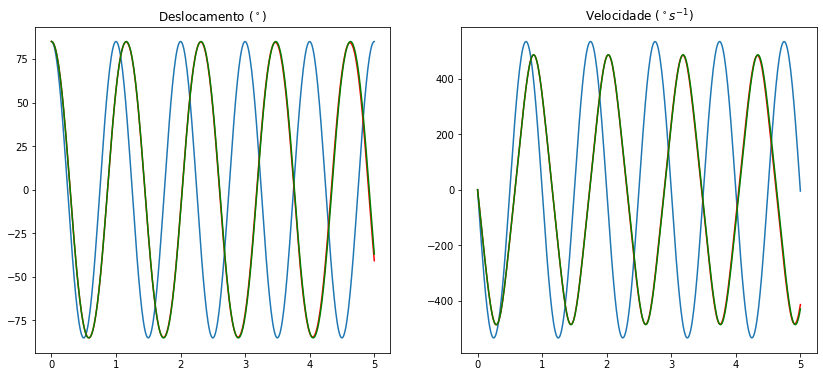

In [172]:
sol_3 = sp.integrate.solve_ivp(pend_non_linear, t_span=(times[0], times[-1]), y0=y0,
                               args=(-g/l,), jac=Jac, method='Radau',
                               t_eval=times, vectorized=True)   

print(f"Mensagem solução não linear: {sol_3.message}")
if sol_3.success:
    print(f"Solução linear convergiu após {sol_3.nfev} passos.")
    
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, np.degrees(sol_1.y[0])) # Posição
ax[0].plot(sol_2.t, np.degrees(sol_2.y[0]), color='red')
ax[0].plot(sol_3.t, np.degrees(sol_3.y[0]), color='green')
ax[0].set_title(r'Deslocamento (${}^\circ$)')
ax[1].plot(sol_1.t, np.degrees(sol_1.y[1])) # Velocidade
ax[1].plot(sol_2.t, np.degrees(sol_2.y[1]), color='red')  
ax[1].plot(sol_3.t, np.degrees(sol_3.y[1]), color='green')  
_ = ax[1].set_title(r'Velocidade (${}^\circ s^{ -1}$)')

Aparentemente não há muita diferença.

## Energia mecânica total

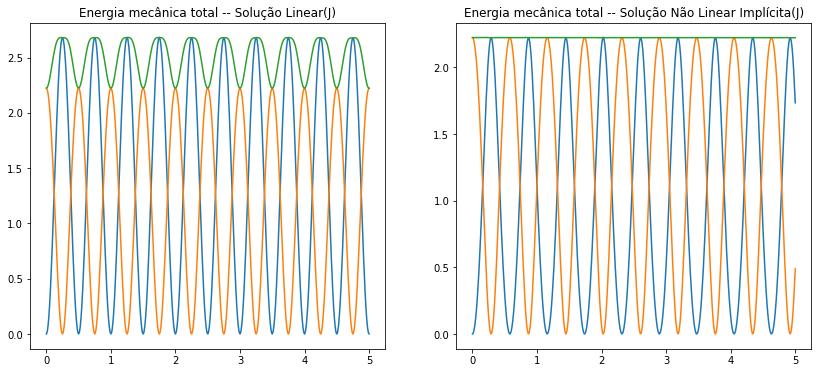

In [173]:
T3 = 0.5*l**2*sol_3.y[1]**2
U3 = g*l*(1-np.cos(sol_3.y[0]))
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(sol_1.t, T1) 
ax[0].plot(sol_1.t, U1)
ax[0].plot(sol_1.t, T1+U1)
ax[1].plot(sol_1.t, T3) 
ax[1].plot(sol_1.t, U3)
ax[1].plot(sol_1.t, T3+U3)
ax[0].set_title(r'Energia mecânica total -- Solução Linear(J)')
_ = ax[1].set_title(r'Energia mecânica total -- Solução Não Linear Implícita(J)')